In [1]:
import wdlen
from new_childes import CHILDESCorpusReader
import slope
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import content_characteristics as cc
import utterance_development as ud
import pickle

In [2]:
illegal =  [['b', 'i', 'o', 'b', 'b', 'b'], ['b', 'e', 'a', 'o'], ['e', 'a', 'u'], ['e', 'a'], ['a', 'boo'], ['hi', 'ho'], ['oh', 'ooh', 'ooh'], ['tee', 'kla'], ['bok', 'bok', 'there'], ['Y', 'T'], ['A', 'D'], ['bow', 'wow', 'bow', 'wow', 'bow', 'wow', 'eek', 'bow', 'wow', 'eek'], ['a', 'y'], ['k', 'k', 'k', 'k', "that's", 'a', 'k'], ['ho', 'ho', 'ho', 'hoo'], ['Ma', 'Ma', 'ma'], ['c', 'd', 'c', 'd', 'c', 'd'], ['cheesy', 'baby', 'big', 'big', 'big', 'big', 'puppy'], ['cheesy', 'baby', 'big', 'big', 'big', 'big'], ['water', 'water', 'water', 'Mommy', 'Mommy', 'water', 'water', 'Mama'], ['um', 'uh'], ['a', 'z'], ['a', 'b'], ['b', 'c'], ['i', 'o']] 

In [3]:
corpus_root = nltk.data.find( 'corpora/CHILDES/Eng-NA-MOR/')
Providence = CHILDESCorpusReader(corpus_root, 'Providence-xml/.*.xml')
#wd_list = wdlen.check(Providence, illegal)
#wd_list

# Number of utterances

In [4]:
n = wdlen.n_sent(Providence, illegal)

overall: 100%|██████████| 364/364 [02:50<00:00,  1.50it/s]


In [5]:
n

115510

In [4]:
u_two = wdlen.print_u(Providence, illegal, 30, 2)

overall: 100%|██████████| 364/364 [02:54<00:00,  1.61it/s]


In [8]:
df_sent = pd.DataFrame(u)
df_sent = df_sent[['fname', 'age', 'sent', 'structure']]

In [9]:
writer = pd.ExcelWriter('Providence two word structure before 30.xlsx')
df_sent.to_excel(writer,'Sheet1')
writer.save()

In [4]:
wdlen_list = wdlen.wdlen_nc(Providence, illegal)

overall: 100%|██████████| 364/364 [02:34<00:00,  1.97it/s]


In [13]:
wdlen_five = wdlen.wdlen_five(Providence, illegal)

overall: 100%|██████████| 364/364 [02:39<00:00,  1.95it/s]


In [6]:
df = pd.DataFrame(wdlen_list).dropna()
df = df[['fname', 'age', 'one','two','three', 'four', 'five']]

In [14]:
df = pd.DataFrame(wdlen_five).dropna()
df = df[['fname', 'age', 'five', 'six']]

In [15]:
writer = pd.ExcelWriter('Providence_five.xlsx')
df.to_excel(writer,'Sheet1')
writer.save()

# compare two with three

In [4]:
u_two = wdlen.print_u(Providence, illegal, 50, 2)
u_three = wdlen.print_u(Providence, illegal, 50, 3)

overall: 100%|██████████| 364/364 [03:01<00:00,  1.56it/s]


In [5]:
with open("u_two", "wb") as fp:   #Pickling
     pickle.dump(u_two, fp)
with open("u_three", "wb") as fp:   #Pickling
     pickle.dump(u_three, fp)

In [4]:
with open("u_two", "rb") as fp:   # Unpickling
     u_two = pickle.load(fp)
with open("u_three", "rb") as fp:   # Unpickling
     u_three = pickle.load(fp)

In [6]:
compare_23_sequence = ud.compare_sentence_sequence(u_two, u_three)
compare_23_nosequence = ud.compare_sentence_nosequence(u_two, u_three)

overall: 100%|██████████| 20591/20591 [06:09<00:00, 55.79it/s]


In [5]:
css_same_child = ud.css_same_child(u_two, u_three)
csn_same_child = ud.csn_same_child(u_two, u_three)

overall: 100%|██████████| 20591/20591 [02:17<00:00, 150.06it/s]


In [7]:
df_sequence = pd.DataFrame(compare_23_sequence).dropna()
df_sequence = df_sequence[['fname_two', 'fname_three', 'age_two', 'age_three', 'two', 'three', 'difference']]
df_nosequence = pd.DataFrame(compare_23_nosequence).dropna()
df_nosequence = df_nosequence[['fname_two', 'fname_three', 'age_two', 'age_three', 'two', 'three', 'difference']]

In [6]:
df_css = pd.DataFrame(css_same_child).dropna()
df_css = df_css[['fname_two', 'fname_three', 'age_two', 'age_three', 'two', 'three', 'difference']]
df_csn = pd.DataFrame(csn_same_child).dropna()
df_csn = df_csn[['fname_two', 'fname_three', 'age_two', 'age_three', 'two', 'three', 'difference']]

In [7]:
writer = pd.ExcelWriter('Providence_23_sequence_samechild.xlsx')
df_css.to_excel(writer,'Sheet1')
writer.save()
writer = pd.ExcelWriter('Providence_23_nosequence_samechild.xlsx')
df_csn.to_excel(writer,'Sheet1')
writer.save()

# Determine if the three-word utterances have structure

In [2]:
# By each child, use the gra first and then use a trigram language model

In [4]:
u_grathree = wdlen.print_u_gra(Providence, illegal, 50, 3)

overall: 100%|██████████| 364/364 [05:28<00:00,  1.12it/s]


In [5]:
with open("u_grathree", "wb") as fp:   #Pickling
     pickle.dump(u_grathree, fp)

In [4]:
with open("u_grathree", "rb") as fp:   # Unpickling
     u_grathree = pickle.load(fp)

In [6]:
u_structure = cc.structure(u_grathree)

In [7]:
with open("u_structure_three", "wb") as fp:   #Pickling
     pickle.dump(u_structure, fp)

In [ ]:
with open("u_structure_three", "rb") as fp:   # Unpickling
     u_grathree = pickle.load(fp)

In [8]:
df_sent = pd.DataFrame(u_structure)
df_sent = df_sent[['fname', 'age', 'sent', 'structure']]

In [9]:
writer = pd.ExcelWriter('Providence_three_gra.xlsx')
df_sent.to_excel(writer,'Sheet1')
writer.save()

## with the help of lm

In [1]:
# training data: {'word': 6756561, 'sent': 1522585}
# using kenLM
# LM score is stored in 'providence_three_gralm

In [6]:
with open("test_random", "rb") as fp:   # Unpickling
     u_lm_random = pickle.load(fp)

In [8]:
df_rand = pd.DataFrame(u_lm_random)
df_rand = df_rand[['age', 'fname','new sent', 'sent', 'structure', 'trigram']]

In [9]:
writer = pd.ExcelWriter('Providence_lm_random.xlsx')
df_rand.to_excel(writer,'Sheet1')
writer.save()

## new pos

In [2]:
# Even worse than CHILDES tagger

In [2]:
with open("test_score", "rb") as fp:   # Unpickling
     u_three_gralm = pickle.load(fp)

In [3]:
u_pos = cc.pos_sentence(u_three_gralm)

overall: 100%|██████████| 15952/15952 [3:07:18<00:00,  1.52it/s]  


In [5]:
with open("u_three_gralmpos", "wb") as fp:   #Pickling
     pickle.dump(u_three_gralm, fp)

In [6]:
df_pos = pd.DataFrame(u_three_gralm)
df_pos = df_pos[[2, 3, 'age', 'fname', 'new sent', 'pos_sent', 'sent', 'structure']]

In [7]:
writer = pd.ExcelWriter('Providence_three_gralmpos.xlsx')
df_pos.to_excel(writer,'Sheet1')
writer.save()

## three-word utterances structure-final version

In [3]:
# learning from randomly checked sentences (n=200). 
# Also with the help of rules and trigram language model.

In [2]:
with open("providence_three_finstr", "rb") as fp:   # Unpickling
     u_three_finstr = pickle.load(fp)

In [3]:
df_fin = pd.DataFrame(u_three_finstr)
df_fin = df_fin[['age', 'fname', 'new sent', 'pos', 'sent', 'structure', 'trigram', 'word']]

In [4]:
writer = pd.ExcelWriter('providence_three_finstr.xlsx')
df_fin.to_excel(writer,'Sheet1')
writer.save()

## randomly check the accuracy

In [5]:
with open("test_random", "rb") as fp:   # Unpickling
     u_rand = pickle.load(fp)

In [6]:
df_rand = pd.DataFrame(u_rand)
df_rand = df_rand[['age', 'fname', 'new sent', 'pos', 'sent', 'structure', 'trigram', 'word']]

In [7]:
writer = pd.ExcelWriter('providence_structure_accuracy1.xlsx')
df_rand.to_excel(writer,'Sheet1')
writer.save()

# perplexity

## mother

In [3]:
with open("providence_three_motper", "rb") as fp:   # Unpickling
     u_motper = pickle.load(fp)
df_motper = pd.DataFrame(u_motper)
df_motper = df_motper[['fname', 'sent', 'tri_per']]
writer = pd.ExcelWriter('providence_three_motper.xlsx')
df_motper.to_excel(writer,'Sheet1')
writer.save()

## child

In [11]:
with open("providence_three_chiper", "rb") as fp:   # Unpickling
     u_chiper = pickle.load(fp)
df_chiper = pd.DataFrame(u_chiper)
df_chiper = df_chiper[['age', 'fname', 'new sent', 'pos', 'sent', 'structure','tri_per', 'trigram', 'word']]
writer = pd.ExcelWriter('providence_three_chiper.xlsx')
df_chiper.to_excel(writer,'Sheet1')
writer.save()

### perplexity random check

In [10]:
with open("per_random", "rb") as fp:   # Unpickling
     u_perand = pickle.load(fp)
df_perand = pd.DataFrame(u_perand)
df_perand = df_perand[['age', 'fname', 'new sent', 'pos', 'sent', 'structure','tri_per', 'trigram', 'word']]
writer = pd.ExcelWriter('providence_per_random.xlsx')
df_perand.to_excel(writer,'Sheet1')
writer.save()

# three_word structure with age

## all children

In [4]:
df_fin2 = df_fin.drop(['new sent', 'pos', 'sent', 'trigram'], axis =1)

In [5]:
df_fin3 = df_fin2.groupby(['age', 'structure']).size()

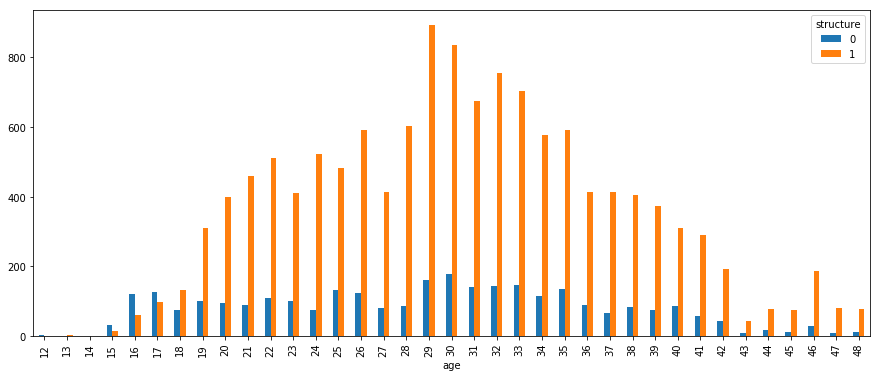

In [14]:
pd.crosstab(df_fin2['age'],df_fin2['structure']).plot.bar(figsize=(15,6))

## per child

In [41]:
# structured sentences appear early for Naima and Ethan. 
# But Almost all of them produce structured sentences predominantly after 20-22 months 

In [40]:
def per_child(df, name):
     df2 = df.loc[df['corpus'] == name]
     pd.crosstab(df2['age'],df2['structure']).plot.bar(figsize=(15,6), title=name)

In [33]:
df_fin2['corpus'] = df_fin2.fname.str.findall(r'\/.*?\/').apply(''.join)

In [34]:
children = df_fin2.corpus.unique()

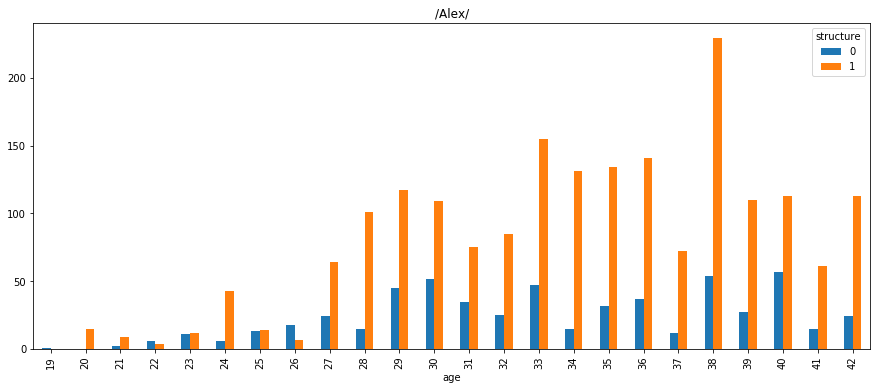

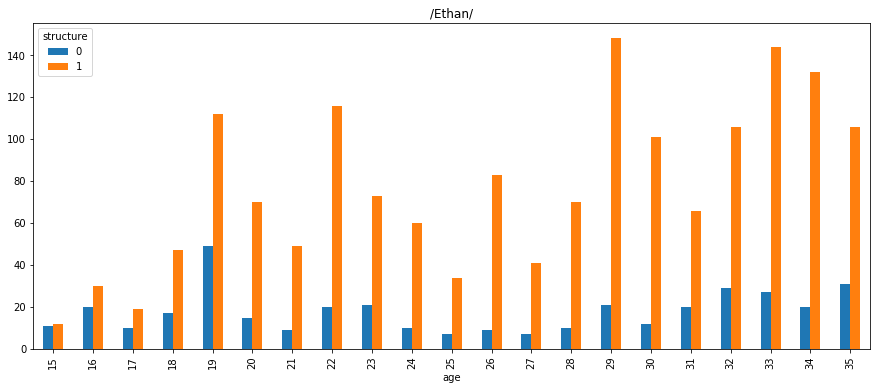

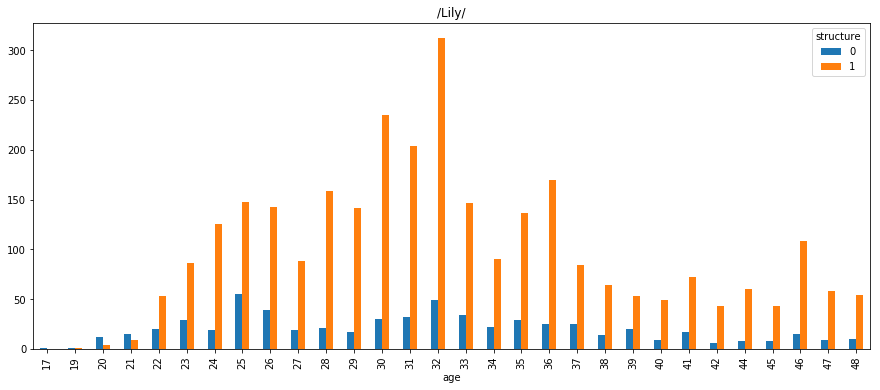

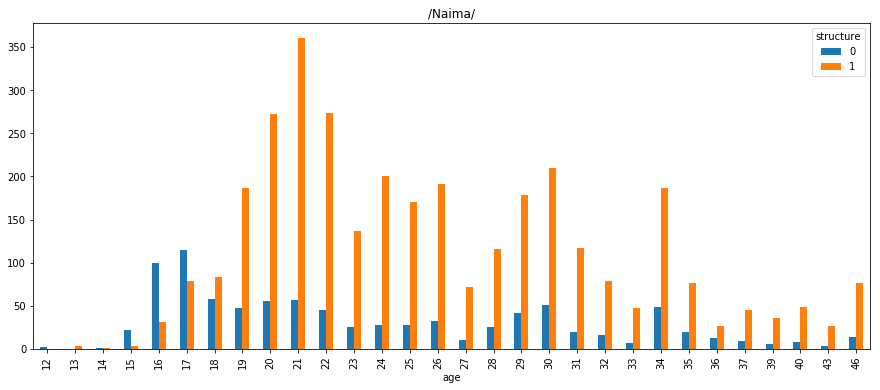

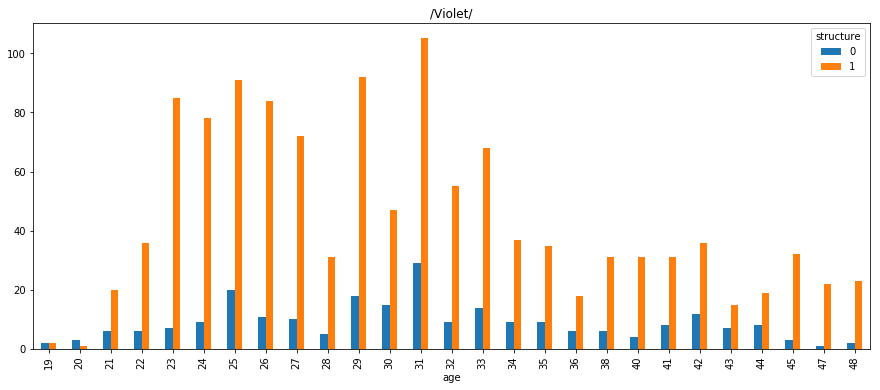

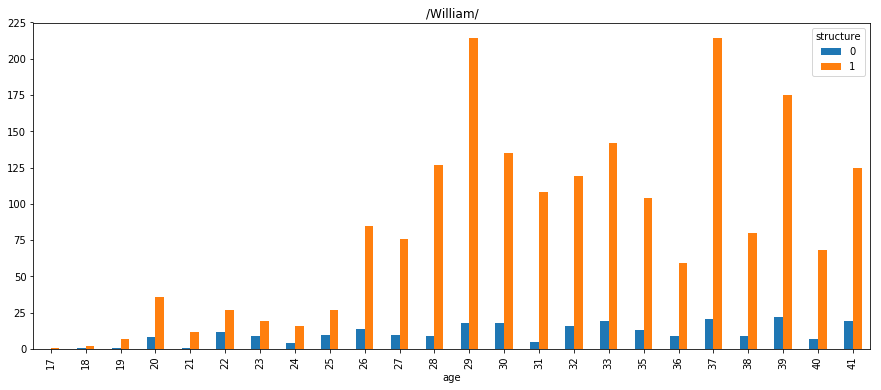

In [41]:
for child in children:    
    per_child(df_fin2, child)

# LM two-word utterances

In [4]:
u_two = wdlen.print_u_gra(Providence, illegal, 50, 2)

overall: 100%|██████████| 364/364 [05:24<00:00,  1.01it/s]


In [7]:
df_utwo = pd.DataFrame(u_two)
df_utwo = df_utwo[['fname', 'age', 'sent']]

In [10]:
with open("providence_two_gra", "wb") as fp:   #Pickling
     pickle.dump(u_two, fp)

In [8]:
writer = pd.ExcelWriter('providence_two.xlsx')
df_utwo.to_excel(writer,'Sheet1')
writer.save()

In [2]:
with open("providence_two_gralm", "rb") as fp:   # Unpickling
     u_twolm = pickle.load(fp)

In [3]:
df_twolm = pd.DataFrame(u_twolm)
df_twolm = df_twolm[['fname', 'age', 'bi_per','sent', 'three_biper', 'three_triper','tri_per']]

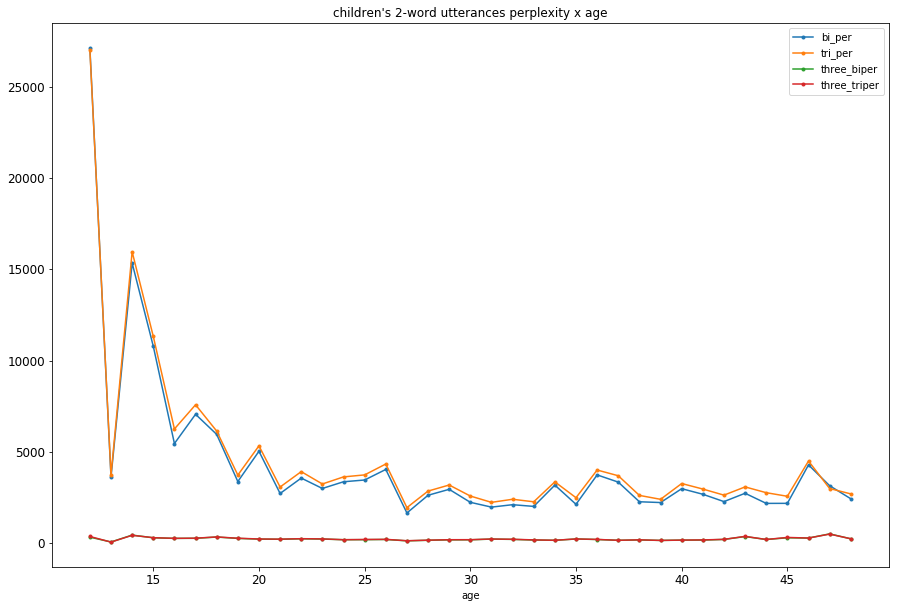

In [4]:
plt.figure()
df2 = df_twolm.groupby('age').mean()[['bi_per', 'tri_per','three_biper', 'three_triper']].reset_index()
df2.set_index('age').plot.line(rot=0, title="children's 2-word utterances perplexity x age", style='.-', markevery=1, figsize=(15,10), fontsize=12)
plt.show()

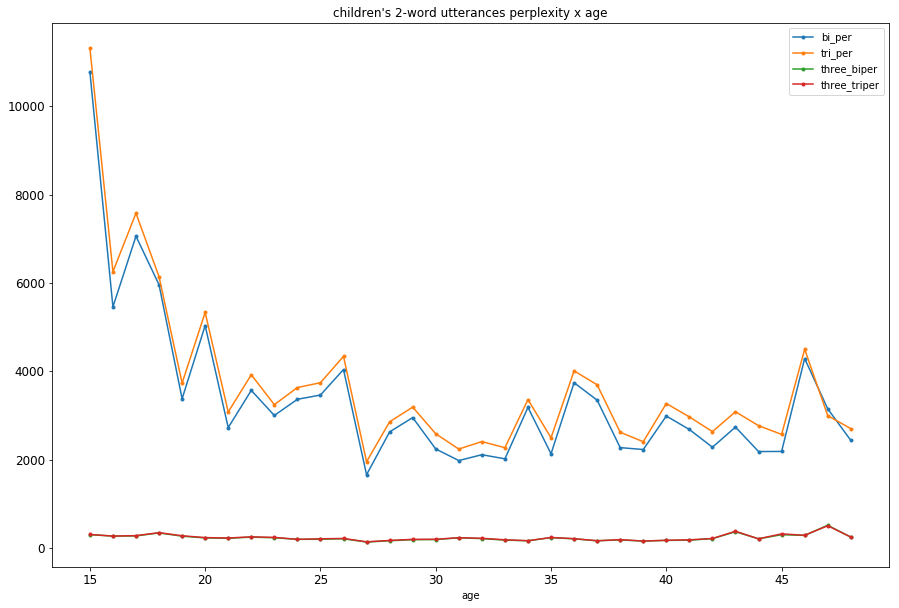

In [7]:
# data before 15 months were dropped due to extremely sparse data
plt.figure()
df2 = df_twolm[df_twolm.age > 14].groupby('age').mean()[['bi_per', 'tri_per','three_biper', 'three_triper']].reset_index()
df2.set_index('age').plot.line(rot=0, title="children's 2-word utterances perplexity x age", style='.-', markevery=1, figsize=(15,10), fontsize=12)
plt.show()

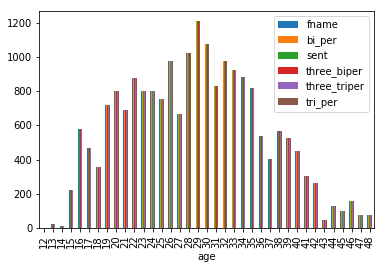

In [55]:
# check how many sentences there are under each age
df_twolm.groupby('age').count().plot.bar()

## training data from mother

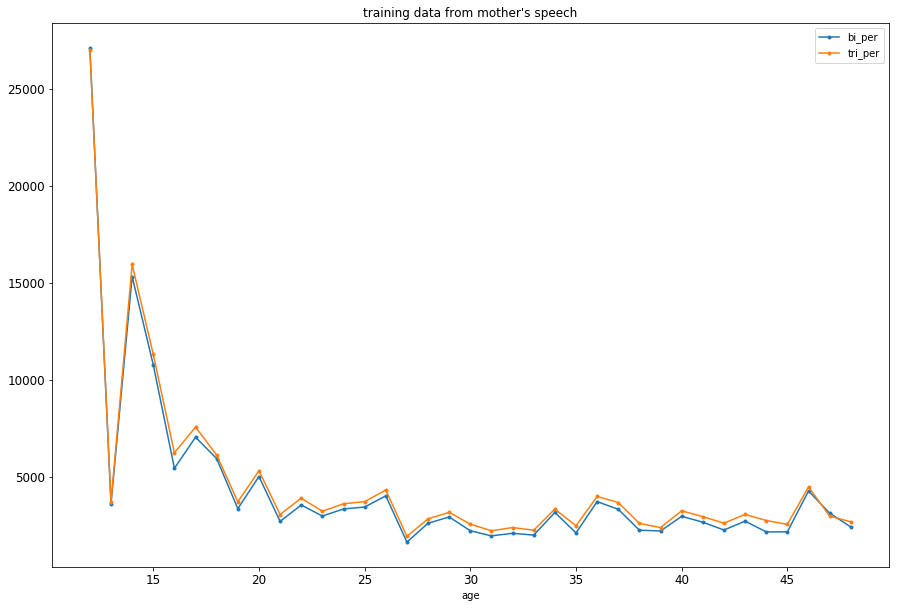

In [45]:
plt.figure()
df2 = df_twolm.groupby('age').mean()[['bi_per', 'tri_per']].reset_index()
df2.set_index('age').plot.line(rot=0, title="training data from mother's speech", style='.-', markevery=1, figsize=(15,10), fontsize=12)
plt.show()

point:  [15.        20.7674954 48.       ]
F1:  5.704119631186037 F2:  0.40712784496339394
F seg linear:  [27.49369213]


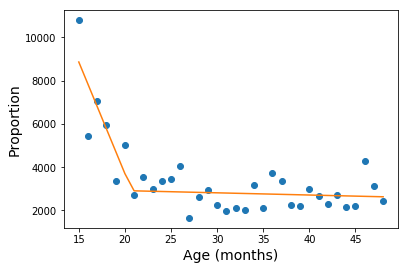

In [6]:
# segmented regression for bi_per
df_mean = df_twolm[df_twolm.age > 14].groupby('age').mean()['bi_per']
slope.seg_regper(df_mean, 2)

### per children

In [5]:
def per_child_per(df, name):
    df_chi = df.loc[df['corpus'] == name]
    df_mean = df_chi[df_twolm.age > 14].groupby('age').mean()['bi_per']
    slope.seg_regper_child(df_mean, name, 2)

In [6]:
df_twolm['corpus'] = df_twolm.fname.str.findall(r'\/.*?\/').apply(''.join)
children = df_twolm.corpus.unique()

C:\Users\ThinkPad\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


/Alex/
point:  [18.        41.8325626 42.       ]
F1:  15.852612843509293 F2:  -1.0
F seg linear:  [1.31012813]
/Ethan/
point:  [15.         16.40894874 35.        ]


D:\academy\two_word_stage\codes\slope.py:528: RuntimeWarning: divide by zero encountered in double_scalars
  F1 = (ss1_mod / 1) / (ss1_res / (len(xHat1) - 2))


F1:  0.0 F2:  1.2395313392115561
F seg linear:  [19.89375357]
/Lily/
point:  [17.         19.44272601 48.        ]
F1:  4.864420128905353 F2:  0.015150996276343547
F seg linear:  [151.95725583]
/Naima/
point:  [15.         16.07682877 46.        ]
F1:  0.0 F2:  0.06199973198131757
F seg linear:  [1.16395899]
/Violet/
point:  [18.         20.99999999 48.        ]
F1:  0.6338309132159188 F2:  0.037078290679098236
F seg linear:  [0.70099305]
/William/
point:  [16. 19. 41.]
F1:  3.0237569135356326 F2:  1.1899140641522605
F seg linear:  [1.28710005]


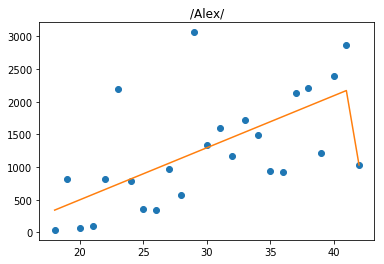

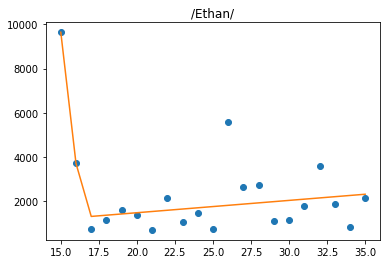

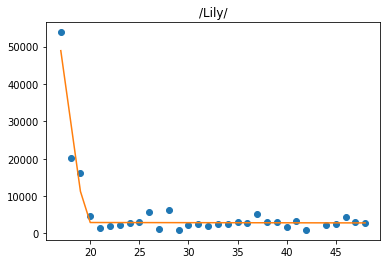

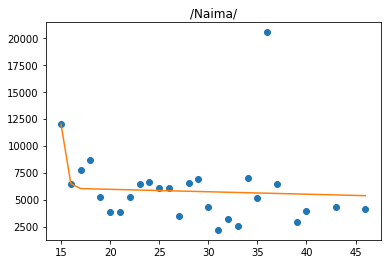

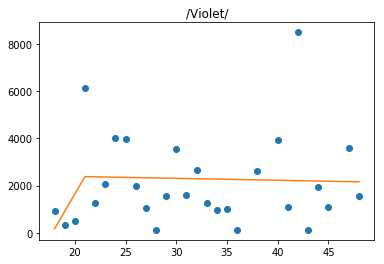

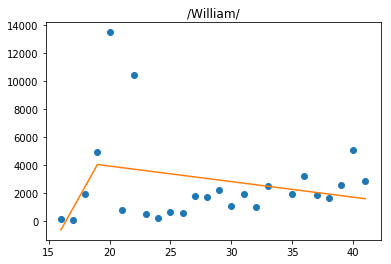

In [7]:
for child in children:    
    per_child_per(df_twolm, child)

## training data from three-word utterances

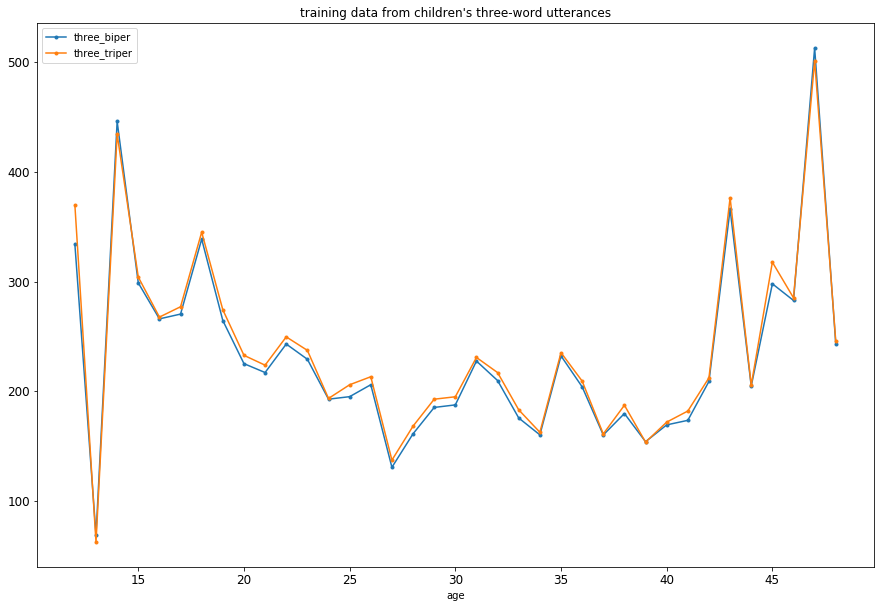

In [44]:
# looks like a u shape change. But might be due to sparse data after 42 months
plt.figure()
df2 = df_twolm.groupby('age').mean()[['three_biper', 'three_triper']].reset_index()
df2.set_index('age').plot.line(rot=0, title="training data from children's three-word utterances", style='.-', markevery=1, figsize=(15,10), fontsize=12)
plt.show()

## With one word utterances before adjusting ages

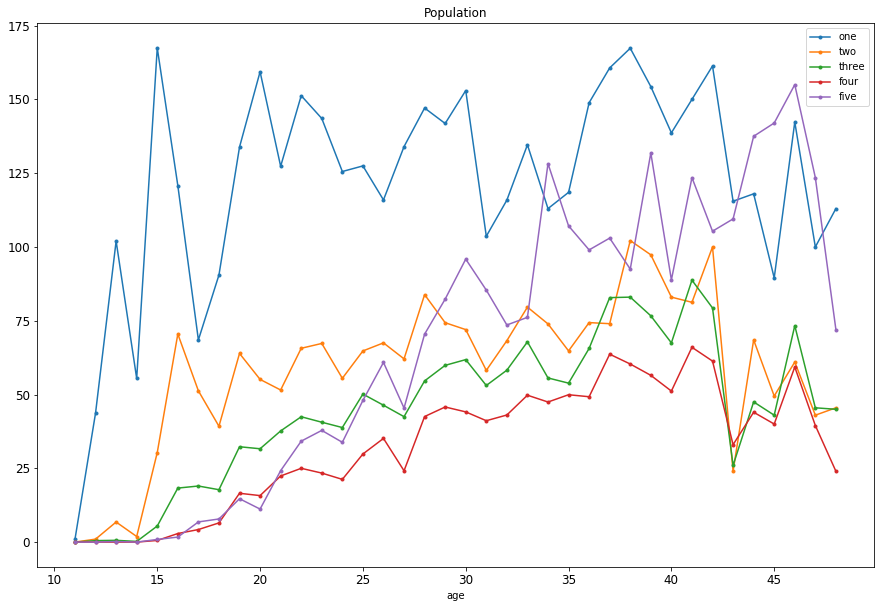

In [6]:
plt.figure()
df2 = df.groupby('age').mean().reset_index()
df2.set_index('age').plot.line(rot=0, title='Population', style='.-', markevery=1, figsize=(15,10), fontsize=12)
plt.show()

In [10]:
df_per = df

In [11]:
df_per['sum'] = df_per.loc[:, 'one':'five'].sum(axis = 1)

In [12]:
df_per.loc[:, "one":"five"] = df_per.loc[:,"one":"five"].div(df_per["sum"], axis=0)

In [13]:
df_per = df_per.drop('sum', axis = 1)

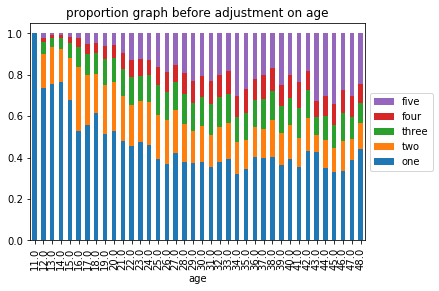

In [13]:
ax = df_per.groupby('age').mean().plot.bar(stacked = True, legend = True, title = 'proportion graph before adjustment on age')
handles, labels= ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Without one-word utterances before adjusting ages

In [14]:
df_no1 = df.drop('one', axis = 1)

In [15]:
df_no1per = df_no1

In [16]:
df_no1per['sum'] = df_no1per.loc[:, 'two':'five'].sum(axis = 1)

In [18]:
df_no1per.loc[:, "two":"five"] = df_no1per.loc[:,"two":"five"].div(df_no1per["sum"], axis=0)

In [19]:
df_no1per = df_no1per.drop('sum', axis = 1)

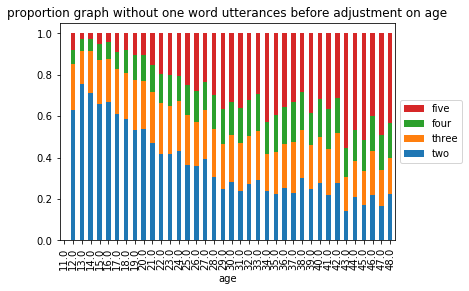

In [20]:
ax = df_no1per.groupby('age').mean().plot.bar(stacked = True, legend = True, title = 'proportion graph without one word utterances before adjustment on age')
handles, labels= ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## With one-word utterances after adjusting ages

In [9]:
df_age1 = df.groupby('age').count()

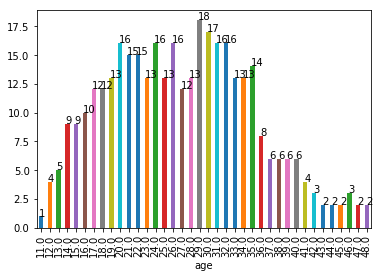

In [10]:
# Before coelescing ages. Few files after 40 months. Cannot really show the developmental trend after 40.
ax = df_age1['fname'].plot(kind='bar') 
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

In [3]:
df_age = pd.read_excel('Providence.xlsx')

In [9]:
df_age = pd.read_excel('Providence_new.xlsx')

In [5]:
df_age2 = df_age.groupby('age.1').count()

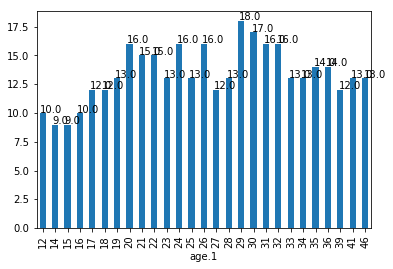

In [30]:
# After coelescing ages
ax = df_age2['fname'].plot(kind='bar') 
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

In [9]:
df_perage = df_age

In [10]:
df_perage = df_perage.drop('age', axis = 1)

In [11]:
df_perage['sum'] = df_perage.loc[:, 'one':'five'].sum(axis = 1)

In [13]:
df_perage.loc[:, 'one':'five'] = df_perage.loc[:, 'one':'five'].div(df_perage['sum'], axis = 0)
df_perage = df_perage.drop(['sum'], axis = 1)

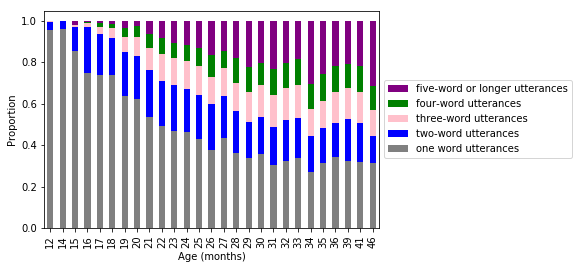

In [14]:
# without aba
# there is one true three-word utterance but invisible from the plot
ax = df_perage.groupby('age.1').mean().plot.bar(stacked = True, legend = True, color = ['grey', 'blue', 'pink', 'green', 'purple'])
handles, labels= ax.get_legend_handles_labels()
legend_name = ['one word utterances', 'two-word utterances', 'three-word utterances', 'four-word utterances', 'five-word or longer utterances']
ax.legend( reversed(handles), reversed(legend_name), loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Age (months)')
ax.set_ylabel('Proportion')
plt.show()

In [21]:
df_mean_s = df_perage.groupby('age.1').mean()

point:  [12.         17.22947107 46.        ]
F1:  10.92798291747525 F2:  17.39307156643117
F seg linear:  [44.15619823]


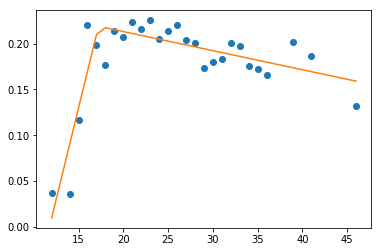

In [23]:
#without aba
slope.seg_reg(df_mean_s, 2)

point:  [12.         18.67347015 46.        ]
F1:  11.85230961886351 F2:  33.502804075314195
F seg linear:  [49.1701003]


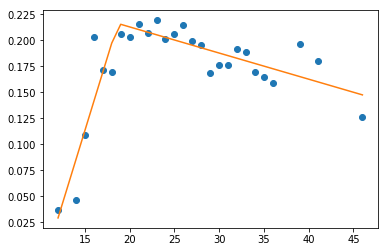

In [18]:
# with aba
slope.seg_reg(df_mean_s)

## After adjusting ages
### two to five

In [3]:
df_age = pd.read_excel('Providence.xlsx')

In [4]:
df_ageno1 = df_age.drop('one', axis = 1)

In [5]:
df_perageno1 = df_ageno1.drop('age', axis = 1)

In [6]:
df_perageno1['sum'] = df_perageno1.loc[:, 'two':'five'].sum(axis = 1)

In [7]:
df_perageno1.loc[:, 'two':'five'] = df_perageno1.loc[:, 'two':'five'].div(df_perageno1['sum'], axis = 0)
df_perageno1 = df_perageno1.drop(['sum'], axis = 1).dropna()

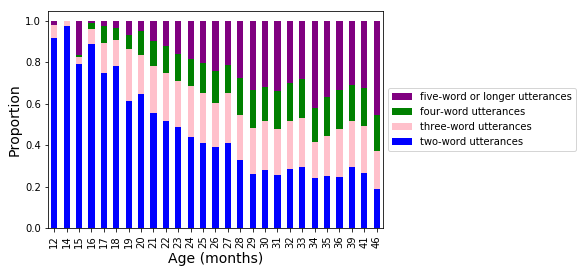

In [8]:
#without aba
ax = df_perageno1.groupby('age.1').mean().plot.bar(stacked = True, legend = True, color = ['blue', 'pink', 'green', 'purple'])
handles, labels= ax.get_legend_handles_labels()
legend_name = [ 'two-word utterances', 'three-word utterances', 'four-word utterances', 'five-word or longer utterances']
ax.legend(reversed(handles), reversed(legend_name), loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Age (months)', fontsize=14)
ax.set_ylabel('Proportion', fontsize=14)
plt.rcParams["axes.labelweight"] = "normal"
plt.show()

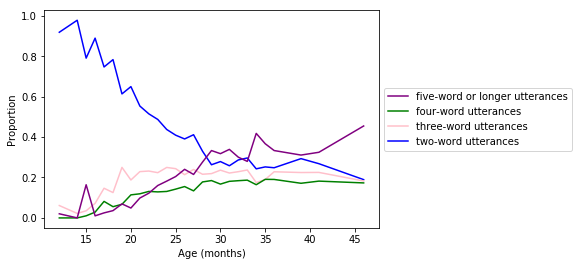

In [8]:
# transform bar graphs to waves
ax = df_perageno1.groupby('age.1').mean().plot.line(color = ['blue', 'pink', 'green', 'purple'])
handles, labels= ax.get_legend_handles_labels()
legend_name = [ 'two-word utterances', 'three-word utterances', 'four-word utterances', 'five-word or longer utterances']
ax.legend(reversed(handles), reversed(legend_name), loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Age (months)')
ax.set_ylabel('Proportion')
#plt.rcParams["axes.labelweight"] = "normal"
plt.show()

### three to five

In [15]:
df_perageno2 = pd.read_excel('Providence_no2.xlsx').dropna()

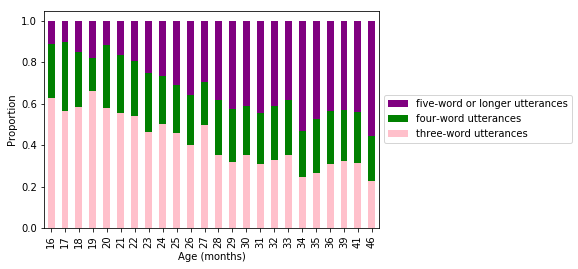

In [40]:
# have few three to five word utterances before 17
# 12-1/10 file, 14-1/9 file, 15-6/9 file, 16-5/9, 17-7/12
# 12-15 months' data was deleted
ax = df_perage.groupby('age.1').mean().plot.bar(stacked = True, legend = True, color = [ 'pink', 'green', 'purple'])
handles, labels= ax.get_legend_handles_labels()
legend_name = [ 'three-word utterances', 'four-word utterances', 'five-word or longer utterances']
ax.legend( reversed(handles), reversed(legend_name), loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Age (months)')
ax.set_ylabel('Proportion')
plt.show()

### four to five

In [16]:
df_perageno3 = pd.read_excel('Providence_no3.xlsx').dropna()

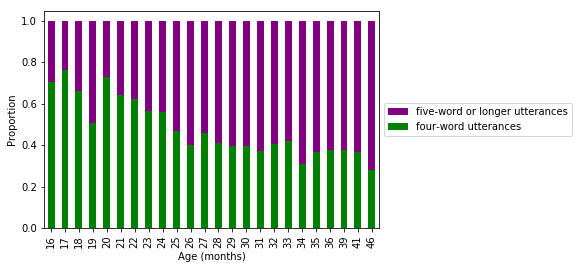

In [7]:
# have few three to five word utterances before 17
# 12-1/10 file, 14-0/9 file, 15-5/9 file, 16-5/10, 17-6/12
# 12-15 months' data was deleted
ax = df_perage.groupby('age').mean().plot.bar(stacked = True, legend = True, color = ['green', 'purple'])
handles, labels= ax.get_legend_handles_labels()
legend_name = [ 'four-word utterances', 'five-word or longer utterances']
ax.legend( reversed(handles), reversed(legend_name), loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Age (months)')
ax.set_ylabel('Proportion')
plt.show()

### five

In [17]:
df_perageno4 = pd.read_excel('Providence_five.xlsx').dropna()

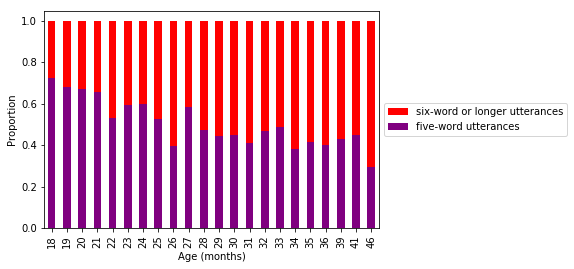

In [17]:
# have few three to five word utterances before 17
# 12-1/10 file, 14-0/9 file, 15-5/9 file, 16-5/10, 17-8/12, 18-7/12, 19-6/13, 
# 12-17 months' data was deleted
# 42-46 are merged due to sparse data
ax = df_perage.groupby('age').mean().plot.bar(stacked = True, legend = True, color = ['purple', 'red'])
handles, labels= ax.get_legend_handles_labels()
legend_name = [ 'five-word utterances', 'six-word or longer utterances']
ax.legend( reversed(handles), reversed(legend_name), loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Age (months)')
ax.set_ylabel('Proportion')
plt.show()

## percentage without three and more word utterances

In [32]:
df_age = pd.read_excel('Providence_new.xlsx')

In [33]:
df_no3 = df_age.loc[:, 'fname':'two']

In [34]:
df_no3 = df_no3.drop(['age'], axis = 1)

In [35]:
df_no3['sum'] = df_no3.loc[:, 'one':'two'].sum(axis = 1)

In [36]:
df_no3.loc[:, "one":"two"] = df_no3.loc[:,"one":"two"].div(df_no3["sum"], axis=0)

In [37]:
df_no3 = df_no3.drop(['sum'], axis = 1)

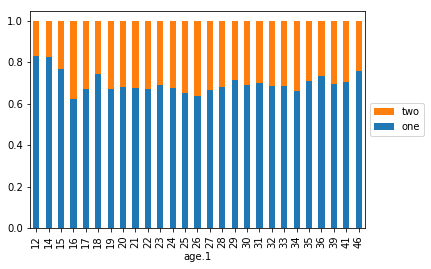

In [32]:
ax = df_no3.groupby('age.1').mean().plot.bar(stacked = True, legend = True)
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

point:  [12.         16.20429598 46.        ]
F1:  4.429370080774346 F2:  5.2598507694768
F seg linear:  [19.49795371]


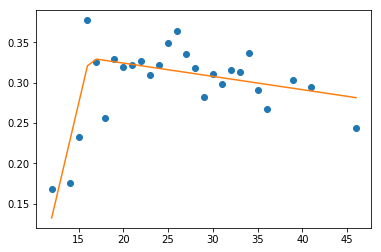

In [34]:
slope.seg_reg(df_no3.groupby('age.1').mean())

## plot per child

In [19]:
def per_child(df, name, group):
    ax = df.loc[df['corpus'] == name].groupby(group).mean().plot.bar(stacked = True, legend = True, title = name)
    handles, labels= ax.get_legend_handles_labels()
    ax.legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

### Without one-word utterances but with the adjustment on ages

In [8]:
df_perageno1['corpus'] = df_perageno1['fname']  # Need to see results after filtering

In [9]:
df_perageno1['corpus'].replace(to_replace="\/0.*", value='', regex=True, inplace=True)

In [10]:
children = df_perageno1.corpus.unique()

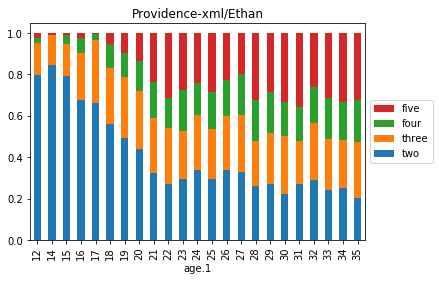

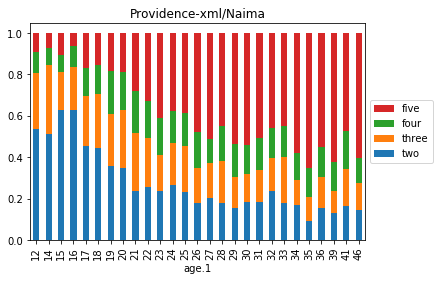

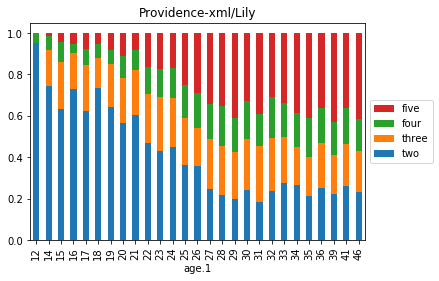

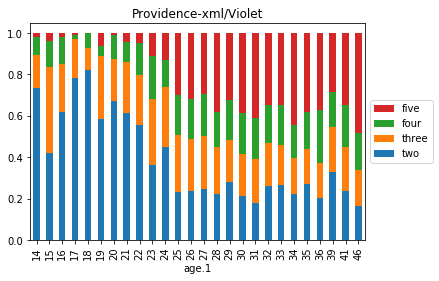

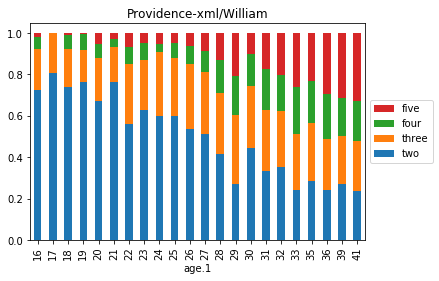

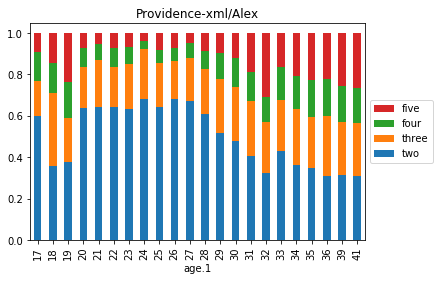

In [23]:
for child in children:   
    per_child(df_perageno1, child, 'age.1')

### three to five

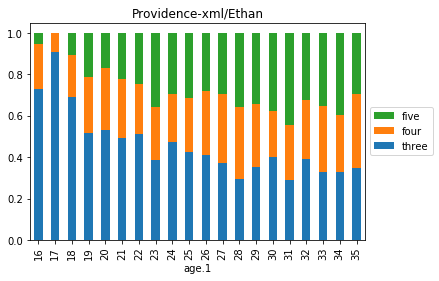

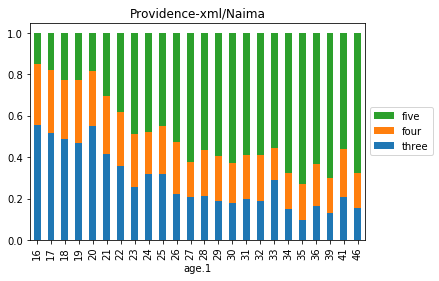

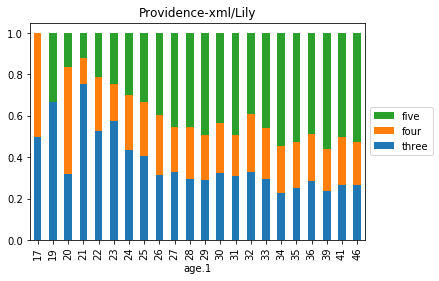

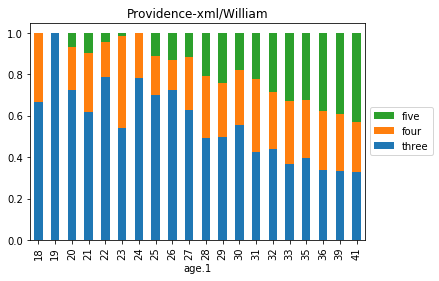

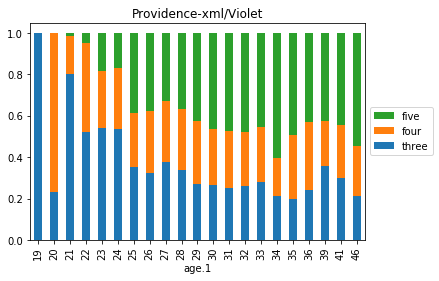

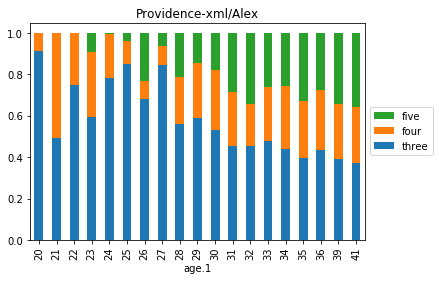

In [23]:
df_perage = pd.read_excel('Providence_no2.xlsx').dropna()
df_perage['corpus'] = df_perage['fname']
df_perage['corpus'].replace(to_replace="\/0.*", value='', regex=True, inplace=True)
children = df_perage.corpus.unique()
for child in children:   
    per_child(df_perage, child, 'age.1')

### four to five

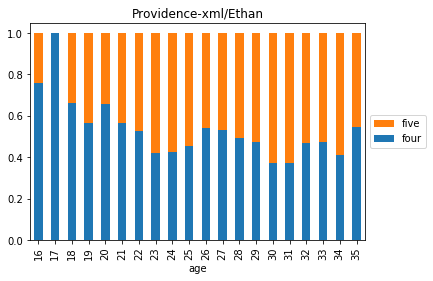

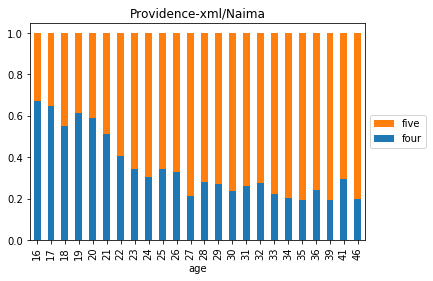

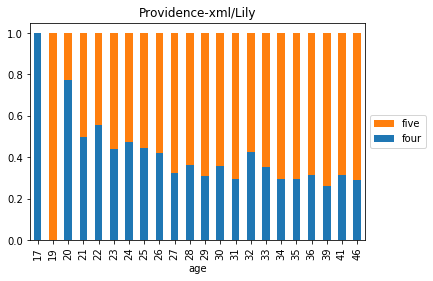

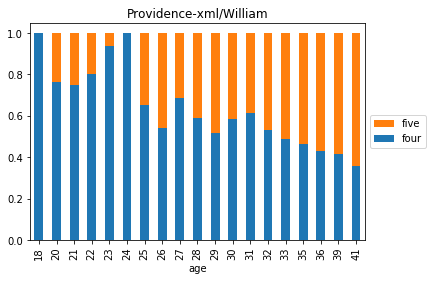

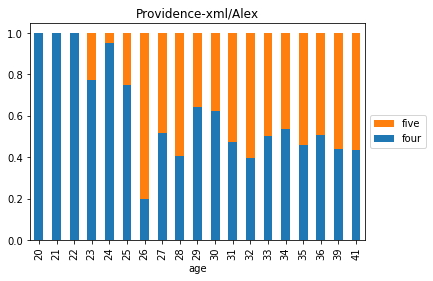

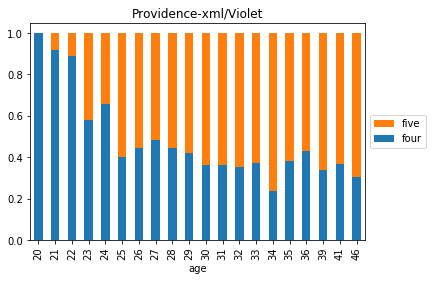

In [25]:
df_perage = pd.read_excel('Providence_no3.xlsx').dropna()
df_perage['corpus'] = df_perage['fname']
df_perage['corpus'].replace(to_replace="\/0.*", value='', regex=True, inplace=True)
children = df_perage.corpus.unique()
for child in children:   
    per_child(df_perage, child, 'age')

### five

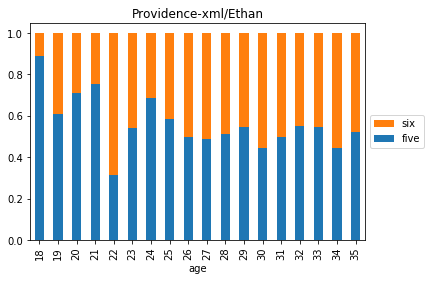

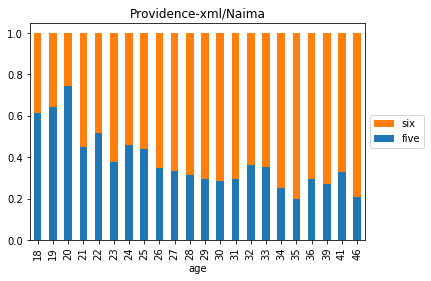

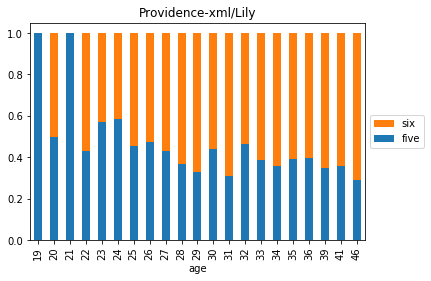

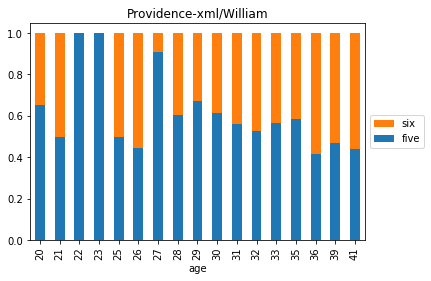

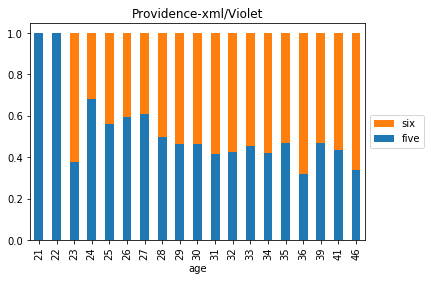

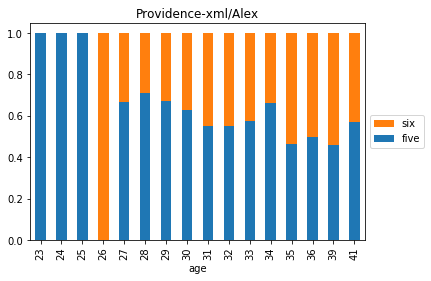

In [26]:
# less obvious trend due to few six word utteraances at 20-21
df_perage = pd.read_excel('Providence_five.xlsx').dropna()
df_perage['corpus'] = df_perage['fname']
df_perage['corpus'].replace(to_replace="\/0.*", value='', regex=True, inplace=True)
children = df_perage.corpus.unique()
for child in children:   
    per_child(df_perage, child, 'age')

# segmented regression

## Overall segmented regression (after adjusting ages)

### two to five

In [9]:
df_mean = pd.read_excel('df mean providence.xlsx').set_index('age.1')

point:  [12.         28.54089853 46.        ]
F1:  213.13149857289596 F2:  3.870524704688342
F seg linear:  [55.04140509]


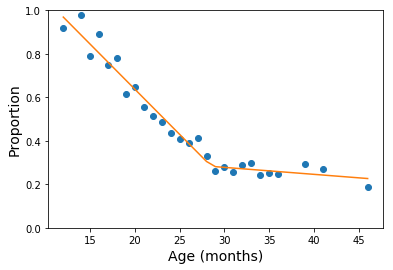

In [10]:
# without aba
slope.seg_reg(df_perageno1.groupby('age.1').mean(), 2, 'two')

point:  [12.         29.01295576 46.        ]
F1:  347.41717245978043 F2:  3.7516314274280926
F seg linear:  [50.88065706]


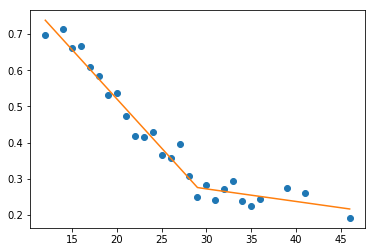

In [4]:
# with aba
slope.seg_reg(df_mean) #F(2, 31) = 50.88

### three to five

point:  [16.         31.03313713 46.        ]
F1:  87.0171145903581 F2:  1.6514977530192736
F seg linear:  [9.33673793]


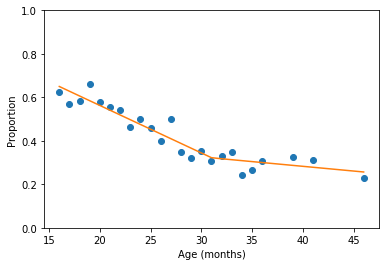

In [41]:
slope.seg_reg(df_perage.groupby('age.1').mean(), 2, 'three')  #F(2, 20) = 9.34, p =  .001368

### four to five

point:  [16.         28.39812294 46.        ]
F1:  29.926956606405547 F2:  7.506025758685277
F seg linear:  [8.83963191]


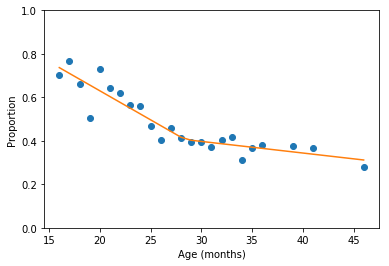

In [8]:
slope.seg_reg(df_perage.groupby('age').mean(), 2, 'four')  #F(2, 20) = 8.84, p = .001775

### five

point:  [18.         25.99999557 46.        ]
F1:  23.27975753182742 F2:  7.136845513139613
F seg linear:  [5.7192304]


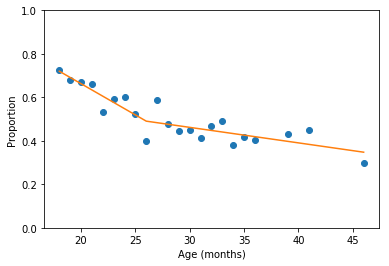

In [18]:
slope.seg_reg(df_perage.groupby('age').mean(), 2, 'five')  #F(2, 20) = 5.72, p = .010857

point:  [12.         28.54002259 46.        ]
F1:  213.14713076659635 F2:  3.8745361683289965
F seg linear:  [55.0413759]
point:  [16.         31.02006761 46.        ]
F1:  87.0864303886345 F2:  1.6629218332656128
F seg linear:  [9.33676778]
point:  [16.         28.40623906 46.        ]
F1:  29.90266711246041 F2:  7.484142066777271
F seg linear:  [8.83965076]
point:  [18.         25.99999986 46.        ]
F1:  23.279748906339396 F2:  7.136840615845011
F seg linear:  [5.7192321]


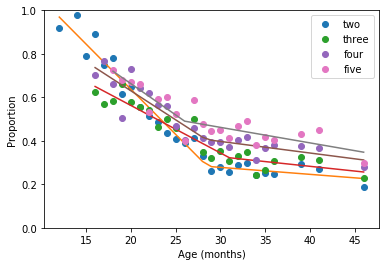

In [20]:
plt.figure()
slope.seg_reg(df_perageno1.groupby('age.1').mean(), 2, 'two') 
slope.seg_reg(df_perageno2.groupby('age.1').mean(), 2, 'three') 
slope.seg_reg(df_perageno3.groupby('age').mean(), 2, 'four') 
slope.seg_reg(df_perageno4.groupby('age').mean(), 2, 'five') 
plt.legend()

## superimposed two-to-five

point:  [12.         28.54198553 46.        ]
F1:  213.11207967945006 F2:  3.865550692645371
F seg linear:  [55.04143237]
point:  [12.         21.39107731 46.        ]
F1:  21.859173251371427 F2:  6.010141429038269
F seg linear:  [37.91500402]
point:  [12.         28.24243837 46.        ]
F1:  139.1318869696012 F2:  0.17737291186324483
F seg linear:  [43.41550009]
point:  [12.         30.99999992 46.        ]
F1:  68.85702517576134 F2:  2.6346758546047067
F seg linear:  [3.98408053]


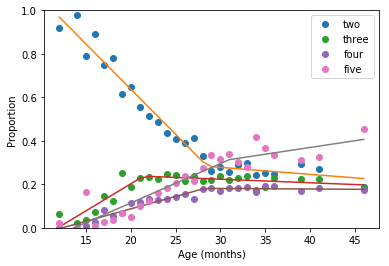

In [10]:
plt.figure()
slope.seg_reg(df_perageno1.groupby('age.1').mean(), 2, 'two') #F(2, 9) = 42.31
slope.seg_reg(df_perageno1.groupby('age.1').mean(), 2, 'three') #F(2, 9) = 42.31
slope.seg_reg(df_perageno1.groupby('age.1').mean(), 2, 'four') #F(2, 9) = 42.31
slope.seg_reg(df_perageno1.groupby('age.1').mean(), 2, 'five') #F(2, 9) = 42.31
plt.legend()

## segmented regression per child

In [31]:
df_perageno1['corpus'] = df_perageno1['fname']

In [32]:
df_perageno1['corpus'].replace(to_replace="\/0.*", value='', regex=True, inplace=True)

In [33]:
children = df_perageno1.corpus.unique()

point:  [12.         21.99999999 35.        ]
F1:  160.0031288428228 F2:  14.357744370371302
F seg linear:  [66.87854522]


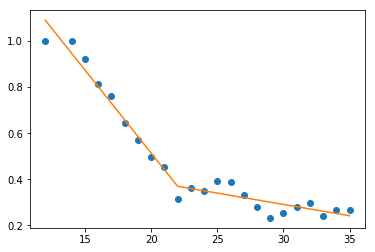

Providence-xml/Ethan None
point:  [12.         22.47869143 46.        ]
F1:  34.821805471877695 F2:  29.757178870370367
F seg linear:  [42.31175093]


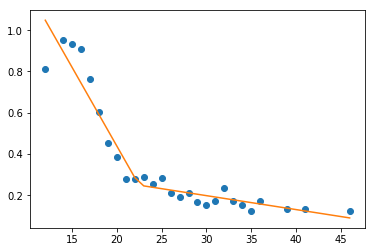

Providence-xml/Naima None
point:  [14.         25.39370566 46.        ]
F1:  46.01649606317939 F2:  0.8347232488990786
F seg linear:  [43.13358359]


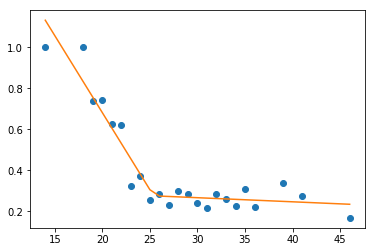

Providence-xml/Violet None
point:  [15.         17.20063035 46.        ]
F1:  0.0 F2:  18.779507002202706
F seg linear:  [6.65420806]


D:\academy\two_word_stage\codes\slope.py:368: RuntimeWarning: divide by zero encountered in double_scalars
  F1 = (ss1_mod / 1) / (ss1_res / (len(xHat1) - 2))


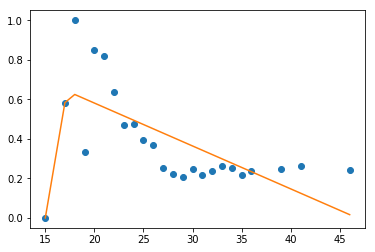

Providence-xml/Lily None
point:  [16.         33.00000002 41.        ]
F1:  148.07179747679015 F2:  0.19999102735638793
F seg linear:  [7.11633088]


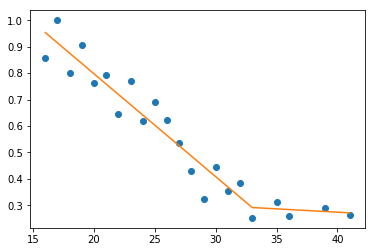

Providence-xml/William None
point:  [18.         36.00000003 41.        ]
F1:  160.74106161247215 F2:  0.0
F seg linear:  [1.8717969]


D:\academy\two_word_stage\codes\slope.py:369: RuntimeWarning: divide by zero encountered in double_scalars
  F2 = (ss2_mod / 1) / (ss2_res / (len(xHat2) - 2))


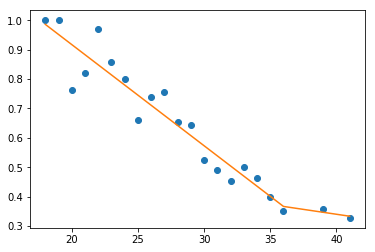

Providence-xml/Alex None


In [35]:
# without aba
for child in children:
    print(child, slope.seg_reg_child(df_perageno1,child, 2))    

In [4]:
wdlen.print_u(Providence, 12)

## Adult

In [28]:
wdlen_mother = wdlen.wdlen_mother(Providence, illegal)

overall: 100%|██████████| 364/364 [03:06<00:00,  1.91it/s]


In [29]:
df_mother = pd.DataFrame(wdlen_mother).dropna()
df_mother = df_mother[['fname', 'age', 'one','two','three', 'four', 'five']]

In [31]:
writer = pd.ExcelWriter('Providence_mother.xlsx')
df_mother.to_excel(writer,'Sheet1')
writer.save()

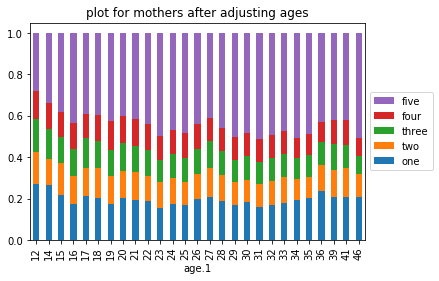

In [32]:
df_mother = pd.read_excel('Providence_mother.xlsx')
df_mother['sum'] = df_mother.loc[:, 'one':'five'].sum(axis = 1)
df_motherper = df_mother
df_motherper.loc[:, 'one':'five'] = df_mother.loc[:, 'one':'five'].div(df_mother['sum'], axis = 0)
df_motherper = df_motherper.drop(['sum', 'age'], axis = 1)
ax = df_motherper.groupby('age.1').mean().plot.bar(stacked = True, legend = True, title = 'plot for mothers after adjusting ages')
handles, labels= ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()